# Hbb vertices  

In this notebook I'd like to investigate the vertices that are produced by the Hbb decay channel. I have implemented the secondary vertices (SV) and V0 in the script I would like to see if this behaves as expected.

In [100]:
save_status=False

In [57]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
def load_data(file_name):
    file = uproot.open(file_name)
    tree = file['tree;1']
    data = tree.arrays(library="np", entry_start=0, entry_stop=250000) # 250k takes 9min to load
    return data

In [59]:
path = "/eos/experiment/fcc/ee/datasets/CLD_fullsim_tagging_Vs/hadded"
dic = {
    "uu": np.array([]),
    "dd": np.array([]),
    "ss": np.array([]),
    "cc": np.array([]),
    "bb": np.array([]),
    "gg": np.array([]),
    "tautau": np.array([])
}

for process in dic.keys():
    data = load_data(f"{path}/H{process}.root")
    dic[process] = data

In [60]:
def make_vertex_dic(htype, type):
    data = dic[htype]
    ids = np.concatenate(data[f"pfcand_{type}_id"])
    x = np.concatenate(data[f"pfcand_{type}_x"])
    y = np.concatenate(data[f"pfcand_{type}_y"])
    z = np.concatenate(data[f"pfcand_{type}_z"])
    M = np.concatenate(data[f"pfcand_{type}_M"])
    ind_unique = np.unique(ids, return_index=True)[1]
    ind_unique = ind_unique[1:] # remove the first element which is zero
    vertex_dic = {"x": x[ind_unique], "y": y[ind_unique], "z": z[ind_unique], "M": M[ind_unique]}
    return vertex_dic
    

In [61]:
dic_V0 = {}
dic_SV = {}

for key in dic.keys():
    dic_V0[key] = make_vertex_dic(key, "V0")
    dic_SV[key] = make_vertex_dic(key, "SV")


In [27]:
#V0_dic = make_vertex_dic("bb", type="V0")
#SV_dic = make_vertex_dic("bb", type="SV")


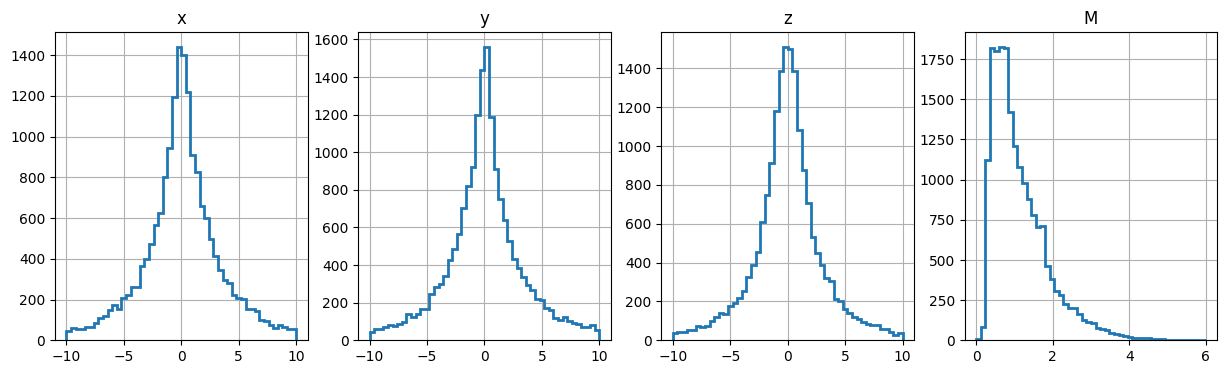

In [62]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
xlims = [[-10,10], [-10,10], [-10,10], [0, 6]]
for i, (key, value) in enumerate(dic_SV["bb"].items()):
        ax[i].hist(value, bins=50, histtype='step', linewidth=2.0, range=xlims[i])
        ax[i].set_title(key)
        ax[i].grid()

plt.show()


Mass spectrum: 
- K0  at 0.5 Gev?
- D mesons at 1.865 GeV?
- Lambda at 2.286 Gev?
- J/psi at 3.100 GeV?
- psi (2s) at 3.686 GeV?

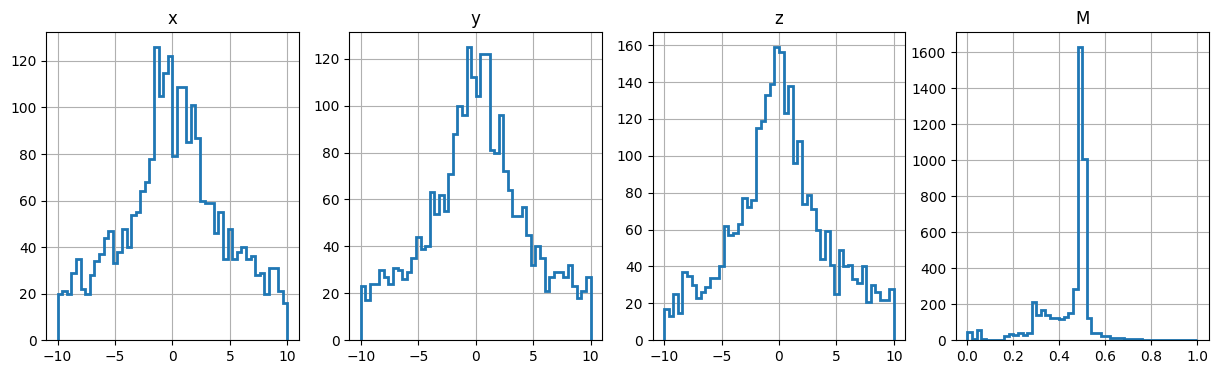

In [63]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
xlims = [[-10,10], [-10,10], [-10,10], [0, 1]]
for i, (key, value) in enumerate(dic_V0["bb"].items()):
    ax[i].hist(value, bins=50, histtype='step', linewidth=2.0, range=xlims[i])
    ax[i].set_title(key)
    ax[i].grid()

plt.show()


Ok, very nice mass peak could be K0 with 497 MeV/c $^2$

In [87]:
exp_SV_masses = np.array([
    1.115683,  # Lambda baryon
    1.115683,  # Lambda baryon
    1.18937,   # Sigma0 baryon
    1.192642,  # Sigma+ baryon
    1.197449,  # Sigma- baryon
    1.31486,   # Xi- baryon
    1.32171,   # Xi0 baryon
    1.67245,   # Omega- baryon
    1.67245,   # Omega- baryon
    1.86483,   # D+ meson
    1.86483,   # D+ meson
    1.86483,   # D+ meson
    1.86965,   # D0 meson
    1.86965,   # D0 meson
    1.86965,   # D0 meson
    1.96834,   # Ds+ meson
    2.00685,   # D*0 meson
    2.00685,   # D*0 meson
    2.01026,   # D*+ meson
    2.01026,   # D*+ meson
    2.28646,   # Lambda_c+
    2.28646,   # Lambda_c+
    2.28646,   # Lambda_c+
    2.28646,   # Lambda_c+
    2.4589,    # Xi_c+
    2.4719,    # Xi_c0
    3.0969     # J/psi meson
])

exp_SV_masses_imp = np.array([
    1.115683,  # Lambda baryon
    1.86965,   # D0 meson
    3.0969     # J/psi meson
])

In [86]:
dic_SV["uu"]["M"]

array([0.5605139 , 0.33112937, 1.2528112 , ..., 0.4378968 , 0.9787077 ,
       0.53293693], dtype=float32)

In [67]:
dic.keys()

dict_keys(['uu', 'dd', 'ss', 'cc', 'bb', 'gg', 'tautau'])

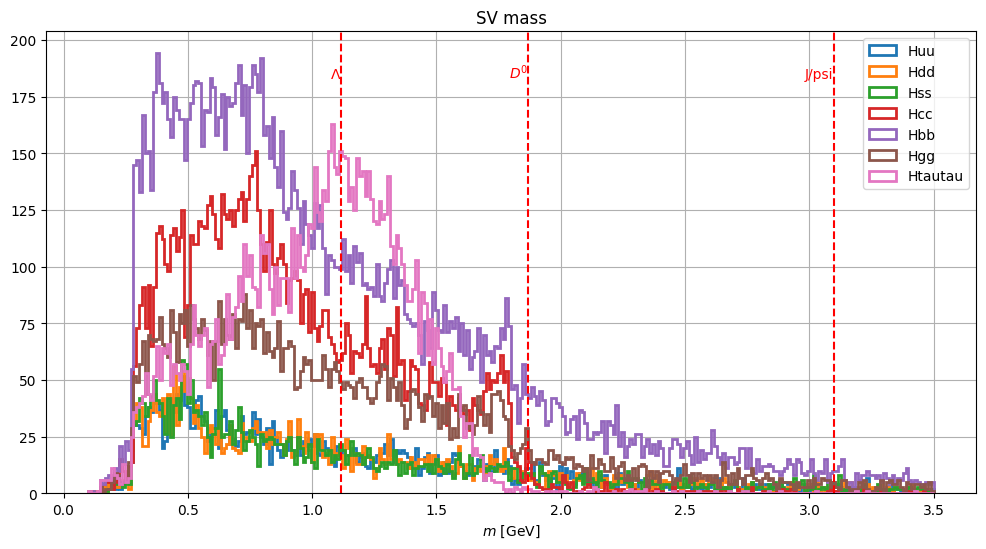

In [96]:
# make SV mass histogram again but bigger 

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for h in dic.keys():
    ax.hist(dic_SV[h]["M"], bins=300, histtype='step', linewidth=2.0, range=[0.1, 3.5], label=f"H{h}")
ax.set_title("SV mass")
ax.grid()
ax.set_xlabel("$m$ [GeV]")
plt.legend()
# Adding red lines with labels
labels = [r'$\Lambda$', r'$D^0$', 'J/psi']
for mass, label in zip(exp_SV_masses_imp, labels):
    ax.axvline(mass, color="red", linestyle="--")
    ax.text(mass, ax.get_ylim()[1] * 0.9, label, color="red", ha='right')

if save_status:
    plt.savefig("./hist-vertices/SV_mass.pdf")
plt.show()

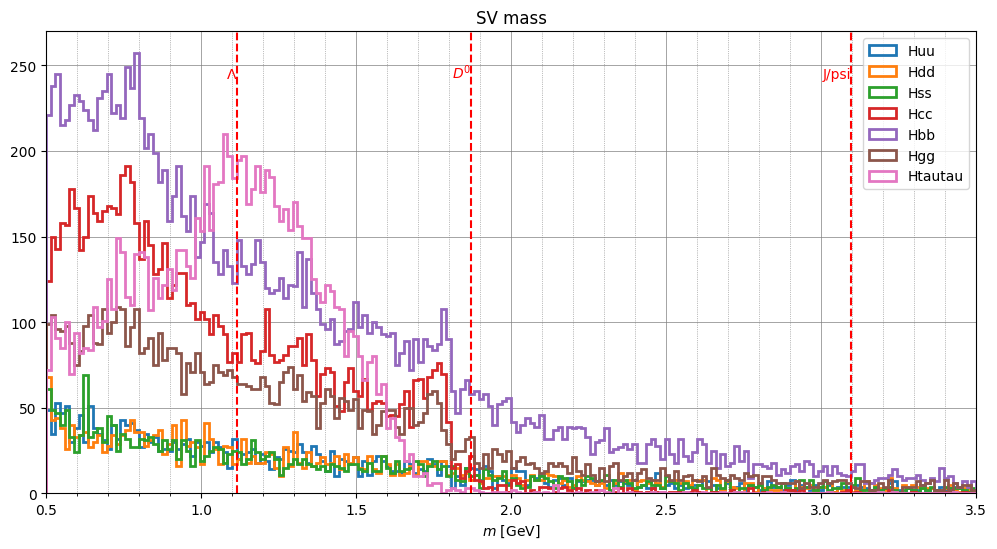

In [97]:
# Generate the histogram
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for h in dic.keys():
    ax.hist(dic_SV[h]["M"], bins=200, histtype='step', linewidth=2.0, range=[0.5, 3.5], label=f"H{h}")

# Set the title and labels
ax.set_title("SV mass")
ax.set_xlabel("$m$ [GeV]")

# Add major and minor ticks
ax.set_xticks([i * 0.5 for i in range(13)])  # Major ticks every 0.5 GeV
ax.set_xticks([i * 0.1 for i in range(61)], minor=True)  # Minor ticks every 0.1 GeV

# Enable grid with finer grid lines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.5)  # Major grid lines
ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Minor grid lines

# Adding red lines with labels
labels = [r'$\Lambda$', r'$D^0$', 'J/psi']
for mass, label in zip(exp_SV_masses_imp, labels):
    ax.axvline(mass, color="red", linestyle="--")
    ax.text(mass, ax.get_ylim()[1] * 0.9, label, color="red", ha='right')

# Display the plot
ax.set_xlim(0.5, 3.5)
plt.legend()
if save_status:
    plt.savefig("./hist-vertices/SV_mass_zoom.pdf")
plt.show()

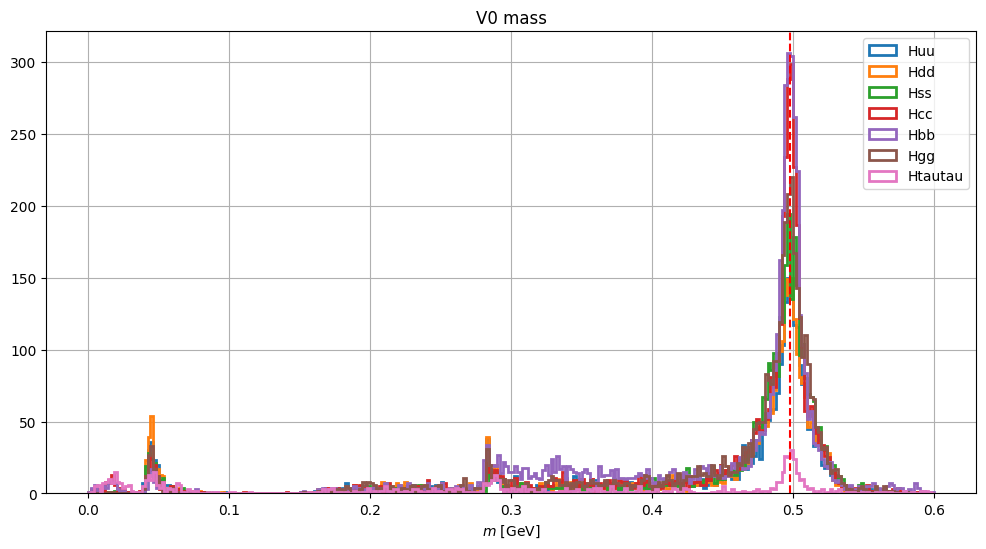

In [98]:
# make SV mass histogram again but bigger 

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for h in dic.keys():
    ax.hist(dic_V0[h]["M"], bins=300, histtype='step', linewidth=2.0, range=[0, 0.6], label=f"H{h}")
ax.set_title("V0 mass")
ax.grid()
ax.set_xlabel("$m$ [GeV]")
#for mass in exp_SV_masses:
ax.axvline(0.4976 , color="red", linestyle="--")
#ax.set_yscale("log")
plt.legend()
if save_status:
    plt.savefig("./hist-vertices/V0_mass.pdf")
plt.show()

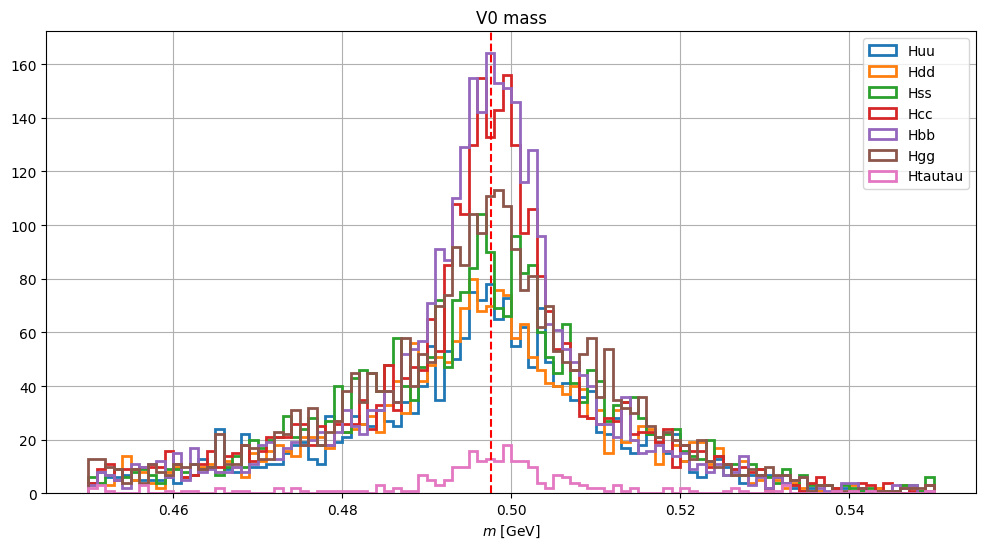

In [99]:
# make SV mass histogram again but bigger 

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for h in dic.keys():
    ax.hist(dic_V0[h]["M"], bins=100, histtype='step', linewidth=2.0, range=[0.45, 0.55], label=f"H{h}")
ax.set_title("V0 mass")
ax.grid()
ax.set_xlabel("$m$ [GeV]")
#for mass in exp_SV_masses:
ax.axvline(0.4976 , color="red", linestyle="--")
#ax.set_yscale("log")
plt.legend()
if save_status:
    plt.savefig("./hist-vertices/V0_mass_zoom.pdf")
plt.show()